# Fashion MNIST Example

## <span style="font-size:25px">Fashion MNIST Example</span>

In [1]:
# 데이터 불러오기

import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

(x_train, t_train), (x_test, t_test) = fashion_mnist.load_data()

print('\ntrain.shape =', x_train.shape, ', train_label.shape =', t_train.shape)
print('\ntest.shape =', x_test.shape, ', test_label.shape =', t_test.shape)

print('\ntrian label =', t_train)   # 학습 데이터 정답 출력
print('\ntest label =', t_test)     # 테스트 데이터 정답 출력

4422102/4422102 [==============================] - 0s 0us/step

train.shape = (60000, 28, 28) , train_label.shape = (60000,)

test.shape = (10000, 28, 28) , test_label.shape = (10000,)

trian label = [9 0 0 ... 3 0 5]

test label = [9 2 1 ... 8 1 5]


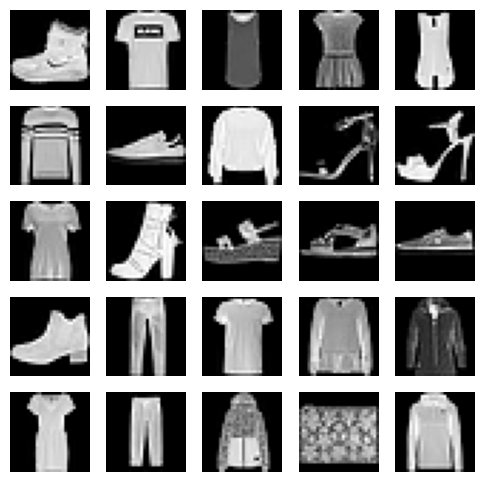

In [2]:
# 데이터 확인

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))    # 25개의 이미지 출력

for index in range(25):

  plt.subplot(5, 5, index + 1)    # 5행 5열
  plt.imshow(x_train[index], cmap='gray')
  plt.axis('off')
  # plt.title(str(t_train[index]))

plt.show()

In [3]:
# 학습 데이터/테스트 데이터 정규화(Normalization)

x_train = (x_train - 0.0) / (255.0 - 0.0)
x_test = (x_test - 0.0) / (255.0 - 0.0)

# 정답 원핫 인코딩은 수행하지 않음

#from tensorflow.keras.utils import to_categorical

#t_train = to_categorical(t_train, num_classes=10)
#t_test = to_categorical(t_test, num_classes=10)

In [4]:
# 모델 구축

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))    # Flatten 없이 사용하려면 차원이 1D이어야 한다.
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [5]:
# 모델 컴파일

from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',     # 원핫인코딩 방식이 아니기에
              metrics=['accuracy'])                       # sparse 사용

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 모델 학습

hist = model.fit(x_train, t_train, epochs=30, validation_split=0.3, verbose=1)

Epoch 1/30
1313/1313 [==============================] - 11s 5ms/step - loss: 0.5338 - accuracy: 0.8148 - val_loss: 0.4599 - val_accuracy: 0.8386
Epoch 2/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4024 - accuracy: 0.8562 - val_loss: 0.3952 - val_accuracy: 0.8602
Epoch 3/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3630 - accuracy: 0.8683 - val_loss: 0.3883 - val_accuracy: 0.8604
Epoch 4/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3354 - accuracy: 0.8780 - val_loss: 0.3498 - val_accuracy: 0.8750
Epoch 5/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3134 - accuracy: 0.8840 - val_loss: 0.3460 - val_accuracy: 0.8757
Epoch 6/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.2977 - accuracy: 0.8896 - val_loss: 0.3342 - val_accuracy: 0.8795
Epoch 7/30
1313/1313 [==============================] - 5s 4ms/step - loss: 0.2820 - accuracy: 0.8963 - val_loss: 0.3345 - val_accuracy

In [7]:
# 모델 정확도 평가

model.evaluate(x_test, t_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4262 - accuracy: 0.8777


[0.42623665928840637, 0.8776999711990356]

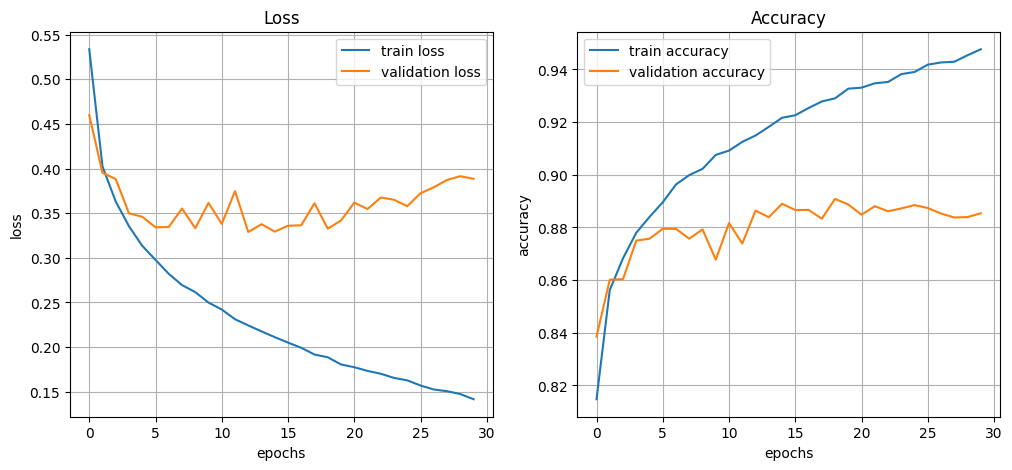

In [8]:
# 출력 방식
plt.figure(figsize=(12, 5))

# Loss Trend

plt.subplot(1, 2, 1)    # 1행, 2열, 1번째
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')


# Accurate Trend

plt.subplot(1, 2, 2)    # 1행, 2열, 2번째
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')


plt.show()

313/313 [==============================] - 1s 1ms/step


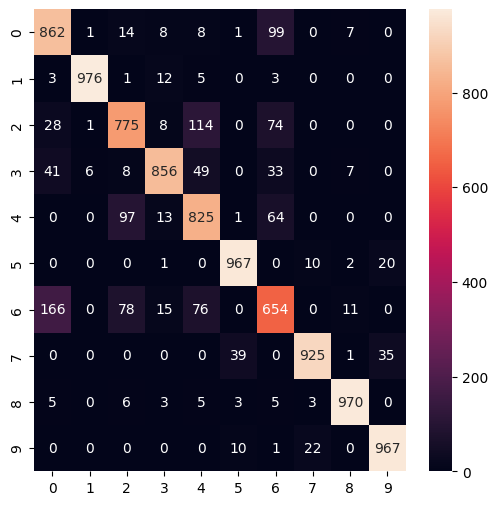

In [9]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(6, 6))

predicted_value = model.predict(x_test)

cm = confusion_matrix(t_test,
                      np.argmax(predicted_value, axis=-1))

sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [10]:
print(cm)
print('\n')

min_accuracy = []

for i in range(10):

  accuracy = np.max(cm[i]) / np.sum(cm[i])

  print(('label = %d\t(%d/%d)\taccuracy = %.3f') %
        (i, np.max(cm[i]), np.sum(cm[i]), accuracy))

  min_accuracy.append(accuracy)

min_accuracy_label = np.argmin(min_accuracy)

print(('\n가장 학습률이 떨어진 label: %d\taccuracy = %.3f') %
      (min_accuracy_label, np.min(min_accuracy)))

[[862   1  14   8   8   1  99   0   7   0]
 [  3 976   1  12   5   0   3   0   0   0]
 [ 28   1 775   8 114   0  74   0   0   0]
 [ 41   6   8 856  49   0  33   0   7   0]
 [  0   0  97  13 825   1  64   0   0   0]
 [  0   0   0   1   0 967   0  10   2  20]
 [166   0  78  15  76   0 654   0  11   0]
 [  0   0   0   0   0  39   0 925   1  35]
 [  5   0   6   3   5   3   5   3 970   0]
 [  0   0   0   0   0  10   1  22   0 967]]


label = 0	(862/1000)	accuracy = 0.862
label = 1	(976/1000)	accuracy = 0.976
label = 2	(775/1000)	accuracy = 0.775
label = 3	(856/1000)	accuracy = 0.856
label = 4	(825/1000)	accuracy = 0.825
label = 5	(967/1000)	accuracy = 0.967
label = 6	(654/1000)	accuracy = 0.654
label = 7	(925/1000)	accuracy = 0.925
label = 8	(970/1000)	accuracy = 0.970
label = 9	(967/1000)	accuracy = 0.967

가장 학습률이 떨어진 label: 6	accuracy = 0.654
